In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV and assign it to the variable data
data = pd.read_csv("vt_tax_data_2016.csv")

# View the first few lines of data
data.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034


In [3]:
data.shape

(1476, 147)

### Modifying flat file imports

Sometimes our dataset is too large as per requirement. In this situations we can take a chunck of our dataset for our use cases. 

The `Vermont tax data` contains 147 columns describing household composition, income sources, and taxes paid by ZIP code and income group. Most analyses don't need all these columns.

We can modify our original dataset as per our need by using several parameters:

1.`usecols` : We can Choose columns to load with the `usecols` keyword argument. It Accepts a `list` of column `numbers` or     `names`, or a `function to lter` column names

2.`nrows` : Limit the number of rows loaded with the nrows keyword argument

3.`skiprows` : It accepts a `list` of `row numbers`, a `number of rows`, or a `function to ,lter` rows

4.`header` : Set `header = None` when there is no need for column names

5.`names` : Supply column names by passing a list to the names argument. The list MUST have a name for every column in your data. If you only need to rename a few columns, do it after the import.

6.`comment` : comment takes characters that comments occur after in the file, for example: `'#'`

7.`na_values` : Use the `na_values` keyword argument to set `custom` missing values. You Can pass a `single value`, `list`, or `dictionary` of columns and values. Suppose in a dataset null_values are put as `"Missing"`, so we'll put `na_values = "Missing"`, then it'll `replace` all the values (written as "Missing") with `NaN`

8.`dtype` : Use the `dtype` keyword argument to specify `column` data types. dtype takes a `dictionary` of `column names` and `data types`

### Ex 1:

Let's focus on household composition to see if there are differences by geography and income level. To do this, we'll need columns: `zipcode`, `agi_stub` (income group), `mars1` (number of single households), `MARS2` (number of households filing as married), and `NUMDEP` (number of dependents).

Create a data frame from vt_tax_data_2016.csv that uses only the selected columns.

In [4]:
# Create list of columns to use
col_names = ["zipcode","agi_stub","mars1","MARS2","NUMDEP"]

In [5]:
# Create data frame from csv using only selected columns
data1 = pd.read_csv("vt_tax_data_2016.csv", usecols = col_names)
data1.head()

,zipcode,agi_stub,mars1,MARS2,NUMDEP
0,0,1,85090,14170,26200
1,0,2,51960,18820,32310
2,0,3,19540,22650,23610
3,0,4,5830,22190,18860
4,0,5,3900,33800,30330


### EX 2:

Import the first 500 rows

In [6]:
# Create data frame of first 500 rows
vt_data_first500 = pd.read_csv("vt_tax_data_2016.csv", nrows = 500)
vt_data_first500.shape

(500, 147)

In [7]:
vt_data_first500.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034


 ### Ex 3:
 
The first 500 rows have been loaded as `vt_data_first500`. You'll get the next 500 rows. To do this, you'll employ several keyword arguments: `nrows` and `skiprows` to get the correct records, `header` to tell pandas the data does not have column names, and `names` to supply the missing column names. You'll also want to use the `list()` function to get `column names` from `vt_data_first500` to `reuse`.

In [8]:
# Create data frame of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", nrows = 500, skiprows = 500, header = None)
vt_data_next500.shape

(500, 147)

In [9]:
vt_data_next500.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,50,VT,5356,2,180,120,40,0,90,250,...,170,497,0,0,0,0,50,76,130,212
1,50,VT,5356,3,80,50,40,0,40,150,...,80,460,0,0,0,0,40,142,50,148
2,50,VT,5356,4,50,0,40,0,40,110,...,50,471,0,0,0,0,0,0,30,87
3,50,VT,5356,5,80,20,50,0,60,170,...,80,2229,0,0,0,0,30,531,30,246
4,50,VT,5356,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
### we can see in this data set there are no column names. So that we can reuse that from the vt_data_first500 dataset

vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", nrows = 500, skiprows = 500, 
                              header = None, names = list(vt_data_first500))


In [11]:
# View the Vermont data frames to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

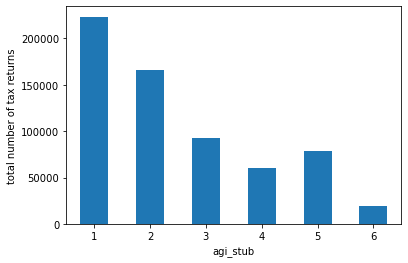

In [12]:
# Plot the total number of 'tax returns' by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.ylabel("total number of tax returns")
plt.xticks(rotation = 360);
plt.show()

In [13]:
# View counts of dependents and tax returns by income level
data.groupby("agi_stub")[["NUMDEP", "N1"]].sum()

,NUMDEP,N1
agi_stub,,
1,52490,223310
2,64660,165570
3,47330,92650
4,37760,60200
5,60730,79130
6,16300,19270


### Ex 4: Specify data types

When loading a flat file, pandas `infers` the best data type for each column. Sometimes its guesses are `off`, particularly for numbers that represent `groups` or `qualities` instead of `quantities`.

Looking at the data dictionary for `vt_tax_data_2016.csv` reveals two such columns. The `agi_stub` column contains `numbers` that correspond to `income` categories, and `zipcode` has 5-digit values that should be `strings` -- treating them as `integers` means we lose leading 0s, which are meaningful. Let's specify the correct data types with the `dtype` argument.

In [16]:
# Load csv with no additional arguments
data = pd.read_csv("vt_tax_data_2016.csv")

# Print the data types
data.dtypes.head()

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
dtype: object

In [15]:
# Create a dictionary, data_types, specifying that agi_stub is "category" data and zipcode is string data.
data_types = {"agi_stub": 'category', "zipcode": 'str'}

# Reload the CSV with the dtype argument and the dictionary to set the correct column data types.
data = pd.read_csv("vt_tax_data_2016.csv", dtype = data_types)

# Print data types of resulting frame
print(data.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


### Ex 5: Set custom NA values

Part of data `exploration` and `cleaning` consists of `checking` for `missing or NA values` and deciding how to account for them. This is easier when `missing` values are treated as their `own` data type. and there are pandas functions that specifically target such `NA` values. pandas automatically treats some values as missing, but we can pass `additional` NA indicators with the `na_values` argument. Here, you'll do this to ensure that invalid `ZIP codes` in the Vermont tax data are coded as `NA`.

In [17]:
# Create a dictionary, null_values, specifying that 0s in the zipcode column should be considered NA values.
null_values = {"zipcode" : 0}

# Load vt_tax_data_2016.csv, using the na_values argument and 
# the dictionary to make sure invalid ZIP codes are treated as missing.
data = pd.read_csv("vt_tax_data_2016.csv", 
                   na_values = null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...  

### Ex 5: Skip bad data

In this exercise you'll use read_csv() parameters to handle files with `bad` data, like records with more values than columns. By default, trying to import such files triggers a specific error, `pandas.io.common.CParserError`.

Some lines in the Vermont tax data here are corrupted. In order to load the good lines, we need to tell pandas to skip errors. We also want pandas to warn us when it skips a line so we know the scope of data issues.

The exercise code will try to read the file. If there is a pandas.io.common.CParserError, the code in the except block will run.

1.Set `error_bad_lines=False` to `skip` unparseable records

2.Set `warn_bad_lines=True` to see `messages` when records are `skipped`

In [ ]:
try:
  # Import the CSV without any keyword arguments
    data = pd.read_csv("vt_tax_data_2016_corrupt.csv")
  # View first 5 records
    print(data.head())

except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")

In [ ]:
## Use the error_bad_lines parameter set to skip bad records.
## and the warn_bad_lines parameter set to issue a warning whenever a bad record is skipped.
try:
    # Set warn_bad_lines to issue warnings about bad records
    data = pd.read_csv("vt_tax_data_2016_corrupt.csv", error_bad_lines=False, warn_bad_lines = True)
    # View first 5 records
    print(data.head())

except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")

### Ex 6: 

Import the first 5 rows of the file `digits.csv` into a DataFrame. Build a `numpy` array from the resulting DataFrame. print the `datatype` of this array. 

In [3]:
data = pd.read_csv("digits.csv", nrows = 5)
data

,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
4,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5


In [4]:
##  Default behavior of pandas is to 'infer' the column names: 
## if no names are passed, the behavior is identical to 'header=0' and column names are inferred from the first line of the file
## if column names are passed explicitly then the behavior is identical to 'header=None'.

# we can see that there is no header in this file. So, it automatically chose the first line of the file as it's header
# so we'll explicitely pass header = None so that it creates a index like column header

data = pd.read_csv("digits.csv", nrows = 5, header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [5]:
## To build a numpy array from a dataset, we need to use .values() method

data_array = data.values
data_array

array([[ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,
         0,  3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,
         0,  5,  8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,
         0,  2, 14,  5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0,
         0],
       [ 0,  0,  0, 12, 13,  5,  0,  0,  0,  0,  0, 11, 16,  9,  0,  0,
         0,  0,  3, 15, 16,  6,  0,  0,  0,  7, 15, 16, 16,  2,  0,  0,
         0,  0,  1, 16, 16,  3,  0,  0,  0,  0,  1, 16, 16,  6,  0,  0,
         0,  0,  1, 16, 16,  6,  0,  0,  0,  0,  0, 11, 16, 10,  0,  0,
         1],
       [ 0,  0,  0,  4, 15, 12,  0,  0,  0,  0,  3, 16, 15, 14,  0,  0,
         0,  0,  8, 13,  8, 16,  0,  0,  0,  0,  1,  6, 15, 11,  0,  0,
         0,  1,  8, 13, 15,  1,  0,  0,  0,  9, 16, 16,  5,  0,  0,  0,
         0,  3, 13, 16, 16, 11,  5,  0,  0,  0,  0,  3, 11, 16,  9,  0,
         2],
       [ 0,  0,  7, 15, 13,  1,  0,  0,  0,  8, 13,  6, 15,  4,  0,  0,
         0,  2,  1, 13, 1

In [6]:
data_array.shape

(5, 65)

In [7]:
type(data_array)

numpy.ndarray

### Ex 7: 

Import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, it--

1.contains `comments` after the character '#'

2.is `tab-delimited`.

3.`na_values` takes a list of strings to recognize as `NA/NaN`, in this case the string `'Nothing'`

In [9]:
## first we import the file without using any arguments 

data = pd.read_csv("titanic_corrupt.txt")
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,# This is a comment,that shouln't be here,but it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Nothing,male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,2,1,Nothing,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,3,1,3,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4,# Another stray comment to mess things up. But...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
888,887,0,2,male,27.0,0.0,0.0,211536,13.0000,NaN,S
889,888,1,1,female,19.0,0.0,0.0,112053,30.0000,B42,S
890,889,0,3,female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S
891,890,1,1,male,26.0,0.0,0.0,111369,30.0000,C148,C


In [11]:
## we can see the comments are here and there in the dataset
## missing values are given as strings "Nothing"
## now we can use some arguments to fix it

t_data = pd.read_csv("titanic_corrupt.txt", sep = ",", comment = "#", na_values = "Nothing")
t_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,NaN,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,NaN,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1.0,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3.0,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1.0,male,26.0,0,0,111369,30.0000,C148,C
